# 

# Diabetes Readmission Prediction Project
---

## Methodology

-   1. Business Understanding
-   2. Data Understanding
-   3. Data Preparation
-   4. Modeling
-   5. Evaluation
-   6. Deployment
---
## 1. Business Understanding

### Introduction
Diabetes is a chronic medical condition characterized by the body's inability to properly regulate blood sugar levels. It affects millions of people worldwide and, if not well-managed, can lead to severe health complications such as cardiovascular disease, kidney failure, and nerve damage. Effective care and monitoring are crucial, especially during and after hospitalizations, to prevent complications and improve patient outcomes.

### Problem Statement
Hospital readmissions for diabetic patients pose a significant burden to both healthcare systems and patients. The dataset for this project represents ten years (1999-2008) of clinical care at 130 U.S. hospitals and integrated delivery networks, encompassing over 100,000 patient records. Each record details a diabetic patient’s hospital encounter, including information on laboratory tests, medications, and hospital stays lasting up to 14 days.

Despite high-quality evidence showing improved outcomes for diabetic patients through preventive and therapeutic interventions, many patients do not receive consistent care. This inconsistency often leads to poor glycemic control, resulting in complications and costly readmissions. These readmissions increase operational costs for hospitals and impact patient well-being.

The maain goal of this project is to develop a machine learning model that can accurately predict the likelihood of readmission for diabetic patients. By identifying high-risk patients, healthcare providers can implement timely interventions to reduce readmissions and improve patient outcomes.

### Key Stakeholders:
- **Healthcare Providers:** Physicians, nurses, and hospital administrators who can use predictions to enhance patient care.
- **Hospital Management:** Decision-makers responsible for reducing operational costs and optimizing resource allocation.
- **Patients:** Individuals diagnosed with diabetes who benefit from improved care and reduced readmissions.
- **Insurance Companies:** Entities interested in minimizing claim costs by encouraging preventive care.

### Objectives:
- **Model Development:** Build a machine learning model to predict the likelihood of early readmission (within 30 days) for diabetic patients.
- **Feature Analysis:** Identify key factors influencing readmission, such as lab test results, length of stay, and medication usage.
- **Actionable Insights:** Provide data-driven recommendations to healthcare providers for targeted interventions.
- **Patient Support:** Improve diabetic patient care by suggesting personalized health management strategies.

### Success Criteria:
- Achieve a predictive model with high recall to minimize false negatives, ensuring fewer high-risk patients are overlooked.
- Deliver insights that support evidence-based healthcare interventions.
- Evaluate model performance using appropriate metrics such as recall, precision, and F1-score.

---

## 2. Data Understanding

### Data Source
Data source link : [Diabetes 130-US Hospitals for Years 1999-2008](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-20)

The dataset contains information extracted from hospital encounters that meet the following criteria:
- Inpatient encounters (hospital admissions) involving diabetic patients.
- Hospital stays of 1 to 14 days.
- Inclusion of laboratory tests and medication administration.


### Data Characteristics
- **Number of Instances:** 101,766 patient records
- **Number of Features:** 47 attributes
- **Data Types:** Categorical and integer features
- **Sensitive Information:** Includes patient demographics such as age, gender, and race
- **Missing Values:** Present in some key attributes, requiring careful handling

### Key Features
- **Patient demographics** (age, race, gender)
- **Admission details** (admission type, length of stay)
- **Clinical data** (number of lab tests, HbA1c test results, number of medications)
- **Healthcare utilization** (number of outpatient, inpatient, and emergency visits in the previous year)

### Data Limitations
- **Class Imbalance:** The target variable (readmission) is highlt imbalanced, likely requiring resampling or class-weighting techniques.
- **Data Gaps:** Missing values in critical features must be addressed through various strategies like imputation or deletion.
- **Outdated Medical Practices:** The dataset, spanning 1999 to 2008, may reflect older medical tests, treatments, and protocols that have since evolved. This could limit the model's relevance by missing recent advancements in diagnostics, medications, and patient care, affecting its accuracy for current patients.


### Potential Challenges
- **Data Imbalance:** Addressing the underrepresentation of early readmissions in the dataset.
- **Data Preprocessing:** Cleaning and transforming raw data to ensure model readiness.
- **Sensitive Data:** Ensuring ethical handling of demographic information like ethnicity.


## 2. Data Preparation
In order to model our data, we first need to prepare it.The first step is to inspect our data set to get a good grasp of the information it contains before we proceed to modeling. 

### Data Inspection

- From the [link](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-20), below is the description of the columns in the dataset


In [1]:
import pandas as pd
path =  "../diabetic_data.csv"
df = pd.read_csv(path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

- The data contains various info on patients as well as the status of readmission

In [4]:
shape = df.shape
print(f"The dataset contains {shape[0]} rows and {shape[1]} columns")



The dataset contains 101766 rows and 50 columns


### Data Description

This dataset provides information on patient encounters, medications, and outcomes, including readmission status. Below is a detailed description of the key variables:

| **No.** | **Variable Name**         | **Description**                                                                 |
|---------|----------------------------|---------------------------------------------------------------------------------|
| 1       | encounter_id               | Unique identifier of an encounter                                               |
| 2       | patient_nbr                | Unique identifier of a patient                                                  |
| 3       | race                       | Values: Caucasian, Asian, African American, Hispanic, and other                 |
| 4       | gender                     | Values: male, female, and unknown/invalid                                       |
| 5       | age                        | Grouped in 10-year intervals: [0, 10), ..., [90, 100)                           |
| 6       | weight                     | Weight in pounds                                                                |
| 7       | admission_type_id          | Integer identifier for values like emergency, urgent, elective                  |
| 8       | discharge_disposition_id   | Integer for outcomes like discharged home, expired, etc.                        |
| 9       | admission_source_id        | Integer for values like physician referral, emergency room                      |
| 10      | time_in_hospital           | Number of days between admission and discharge                                  |
| 11      | payer_code                 | Integer identifier for insurance payer (e.g., Blue Cross/Blue Shield, Medicare) |
| 12      | medical_specialty          | Integer identifier of the admitting physician's specialty (e.g., cardiology)    |
| 13      | num_lab_procedures         | Number of lab tests performed during the encounter                              |
| 14      | num_procedures             | Number of procedures (other than lab tests) performed during the encounter      |
| 15      | num_medications            | Number of distinct generic names administered during the encounter              |
| 16      | number_outpatient          | Number of outpatient visits in the year preceding the encounter                 |
| 17      | number_emergency           | Number of emergency visits in the year preceding the encounter                  |
| 18      | number_inpatient           | Number of inpatient visits in the year preceding the encounter                  |
| 19      | diag_1                     | Primary diagnosis (coded as first three digits of ICD-9; 848 distinct values)   |
| 20      | diag_2                     | Secondary diagnosis (coded as first three digits of ICD-9; 923 distinct values) |
| 21      | diag_3                     | Additional diagnosis (coded as first three digits of ICD-9; 954 distinct values)|
| 22      | number_diagnoses           | Number of diagnoses entered                                                     |
| 23      | max_glu_serum              | Serum glucose test result range: >200, >300, normal, none                       |
| 24      | A1Cresult                  | Test result categories: >8, >7, normal, none                                    |
| 25      | metformin                  | Drug prescription change: up, down, steady, or no                               |
| 26      | repaglinide                | Same as above                                                                    |
| 27      | nateglinide                | Same as above                                                                    |
| 28      | chlorpropamide             | Same as above                                                                    |
| 29      | glimepiride                | Same as above                                                                    |
| 30      | acetohexamide              | Same as above                                                                    |
| 31      | glipizide                  | Same as above                                                                    |
| 32      | glyburide                  | Same as above                                                                    |
| 33      | tolbutamide                | Same as above                                                                    |
| 34      | pioglitazone               | Same as above                                                                    |
| 35      | rosiglitazone              | Same as above                                                                    |
| 36      | acarbose                   | Same as above                                                                    |
| 37      | miglitol                   | Same as above                                                                    |
| 38      | troglitazone               | Same as above                                                                    |
| 39      | tolazamide                 | Same as above                                                                    |
| 40      | examide                    | Same as above                                                                    |
| 41      | citoglipton                | Same as above                                                                    |
| 42      | insulin                    | Same as above                                                                    |
| 43      | glyburide-metformin        | Same as above                                                                    |
| 44      | glipizide-metformin        | Same as above                                                                    |
| 45      | glimepiride-pioglitazone   | Same as above                                                                    |
| 46      | metformin-rosiglitazone    | Same as above                                                                    |
| 47      | metformin-pioglitazone     | Same as above                                                                    |
| 48      | change                     | Indicates medication change: change or no change                                |
| 49      | diabetesMed                | Indicates if diabetic medication was prescribed                                 |
| 50      | readmitted                 | Readmission: <30 days, >30 days, or no readmission                               |

### Checking for Duplicates and Missing Values

In [5]:


# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Loop through columns and check for missing values
print("\nNumber of missing values in each column:")
for column in df.columns:
    missing_values = df[column].isnull().sum()
    print(f"{column}: {missing_values}")

Number of duplicate rows: 0

Number of missing values in each column:
encounter_id: 0
patient_nbr: 0
race: 0
gender: 0
age: 0
weight: 0
admission_type_id: 0
discharge_disposition_id: 0
admission_source_id: 0
time_in_hospital: 0
payer_code: 0
medical_specialty: 0
num_lab_procedures: 0
num_procedures: 0
num_medications: 0
number_outpatient: 0
number_emergency: 0
number_inpatient: 0
diag_1: 0
diag_2: 0
diag_3: 0
number_diagnoses: 0
max_glu_serum: 0
A1Cresult: 0
metformin: 0
repaglinide: 0
nateglinide: 0
chlorpropamide: 0
glimepiride: 0
acetohexamide: 0
glipizide: 0
glyburide: 0
tolbutamide: 0
pioglitazone: 0
rosiglitazone: 0
acarbose: 0
miglitol: 0
troglitazone: 0
tolazamide: 0
examide: 0
citoglipton: 0
insulin: 0
glyburide-metformin: 0
glipizide-metformin: 0
glimepiride-pioglitazone: 0
metformin-rosiglitazone: 0
metformin-pioglitazone: 0
change: 0
diabetesMed: 0
readmitted: 0


- As can be seen above, no columns have missing values

### Overview of the data

Visualizing numerical columns:


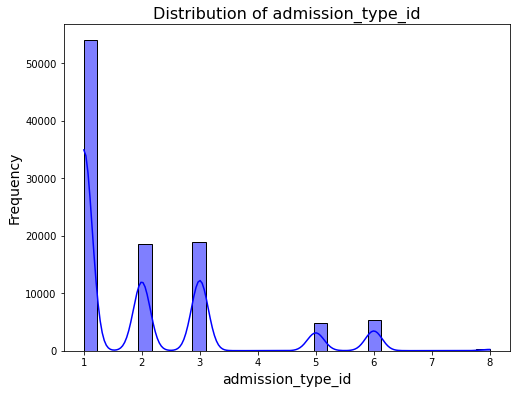

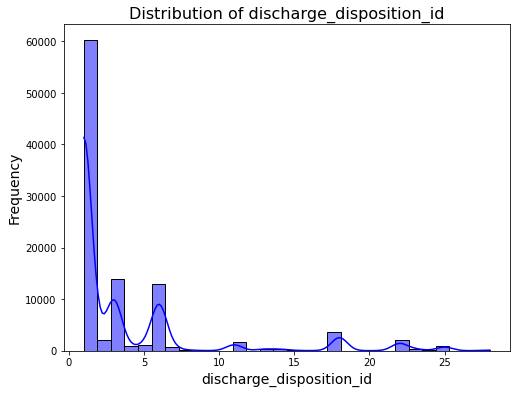

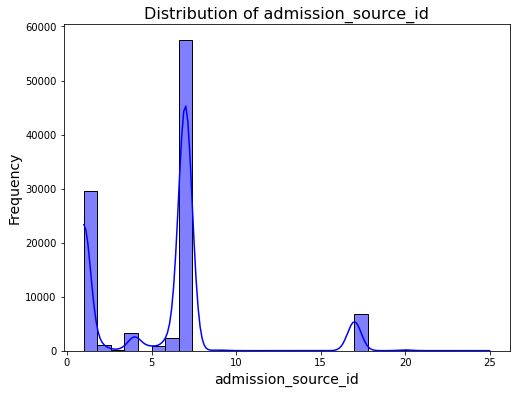

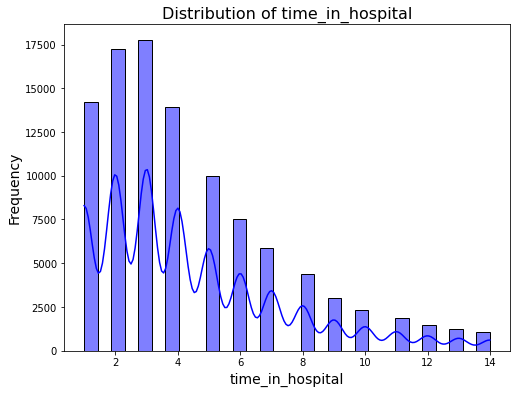

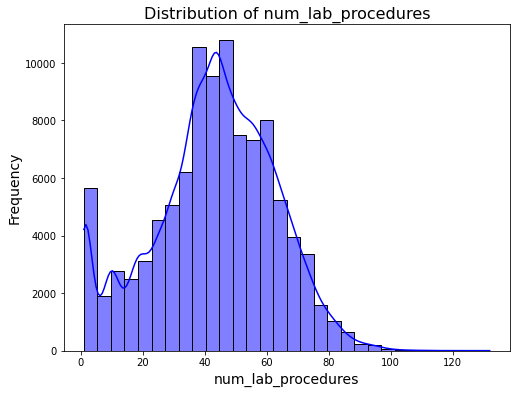

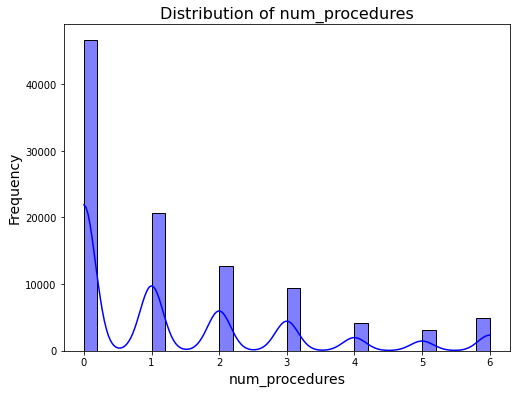

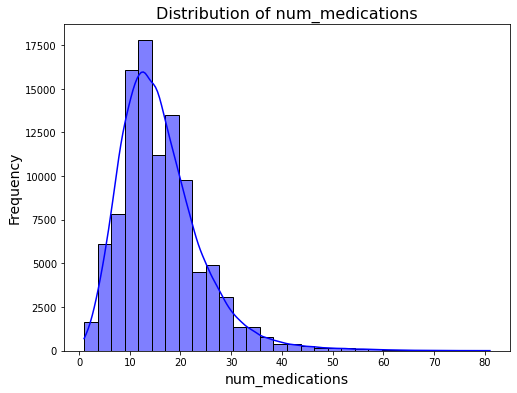

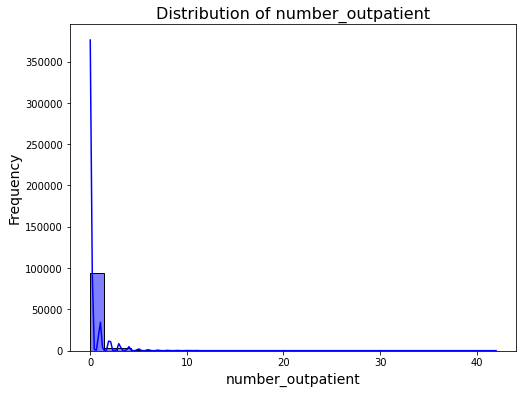

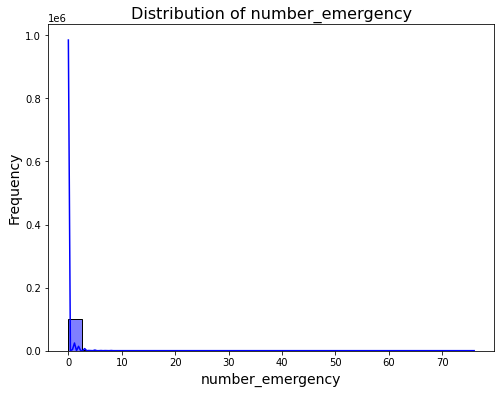

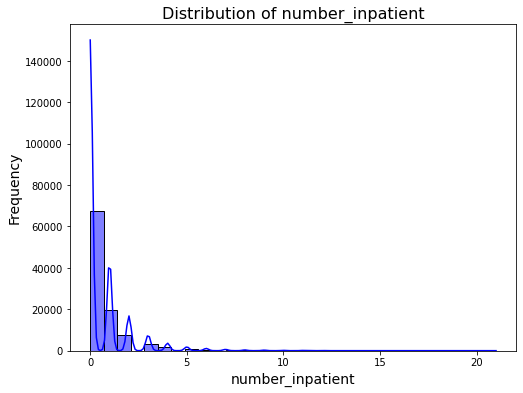

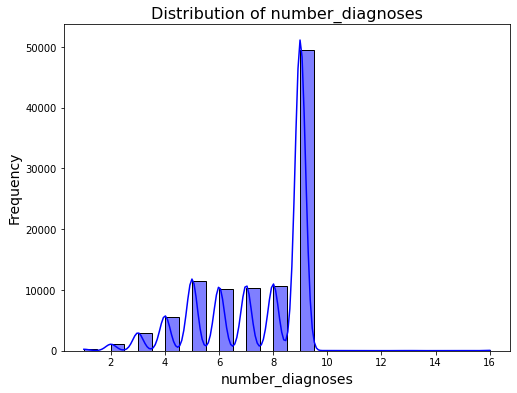

Visualizing categorical columns:
No. of unique columns:  6
Categories:
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
No. of unique columns:  3
Categories:
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
No. of unique columns:  10
Categories:
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
No. of unique columns:  10
Categories:
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
No. of unique columns:  717
Categories:
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
145

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
# Separate numerical and categorical columns

def visualize_distributions(df):
    df_numerical = df.select_dtypes(include=['int64', 'float64'])
    df_categorical = df.select_dtypes(include=['object', 'category'])
    id_columns = ['encounter_id','patient_nbr','payer_code','medical_specialty']


    # Plot numerical columns
    print("Visualizing numerical columns:")
    for column in df_numerical.columns:
        if column not in id_columns:
            plt.figure(figsize=(8, 6))
            sns.histplot(df_numerical[column], kde=True, bins=30, color='blue')
            plt.title(f'Distribution of {column}', fontsize=16)
            plt.xlabel(column, fontsize=14)
            plt.ylabel('Frequency', fontsize=14)
            plt.show()


    # Plot categorical columns
    print("Visualizing categorical columns:")
    for column in df_categorical.columns:
        if column not in id_columns:
            print(f"No. of unique columns:  {df_categorical[column].nunique()}")
            print(f"Categories:\n{df_categorical[column].value_counts()}")

# Apply fn
visualize_distributions(df)

- From the brief overview above, it can be seen that although the dataset has no null values, it contains some errors .eg, some numerical columns should be categorical while some categorical columns have unclear categories. Proceeding to data cleaning:


### Data Cleaning


In [7]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### 1.  Drop unncessary columns

From the column description above, the following columns are not statistically significant or irrelevant.

- `encounter_id`
- `patient_nbr`
- `payer_code`
- `medical_specialty`

In [8]:
cols_to_remove = ['encounter_id','patient_nbr','payer_code','medical_specialty']
df = df.drop(columns= cols_to_remove, axis= 1)

In [9]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### 2.  Column transformation
- The columns [`admission_type_id`,`discharge_disposition_id`,`admission_source_id`] are categorical in nature hence we convert them as necessary

In [10]:
# Convert these columns to categorical data type
df['admission_type_id'] = df['admission_type_id'].astype('category')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')
df['admission_source_id'] = df['admission_source_id'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      101766 non-null  object  
 1   gender                    101766 non-null  object  
 2   age                       101766 non-null  object  
 3   weight                    101766 non-null  object  
 4   admission_type_id         101766 non-null  category
 5   discharge_disposition_id  101766 non-null  category
 6   admission_source_id       101766 non-null  category
 7   time_in_hospital          101766 non-null  int64   
 8   num_lab_procedures        101766 non-null  int64   
 9   num_procedures            101766 non-null  int64   
 10  num_medications           101766 non-null  int64   
 11  number_outpatient         101766 non-null  int64   
 12  number_emergency          101766 non-null  int64   
 13  number_inpatient          101

- The ICD-9 code ranges for the columns `diag_1`,`diag_2` and `diag_3` are as follows :

### ICD-9 Code Ranges for Common Groups

| **Range**  | **Category**                                             |
|------------|----------------------------------------------------------|
| 001-139    | Infectious and Parasitic Diseases                        |
| 140-239    | Neoplasms                                                |
| 240-279    | Endocrine, Nutritional, and Metabolic                    |
| 280-289    | Blood Diseases                                           |
| 290-319    | Mental Disorders                                         |
| 320-389    | Nervous System Disorders                                 |
| 390-459    | Circulatory System Diseases                              |
| 460-519    | Respiratory System Diseases                              |
| 520-579    | Digestive System Diseases                                |
| 580-629    | Genitourinary Diseases                                   |
| 630-679    | Pregnancy-Related Conditions                             |
| 680-709    | Skin and Subcutaneous Tissue Diseases                    |
| 710-739    | Musculoskeletal Diseases                                 |
| 740-759    | Congenital Anomalies                                     |
| 760-779    | Perinatal Conditions                                     |
| 780-799    | Symptoms, Signs, and Ill-Defined Conditions              |
| 800-999    | Injury and Poisoning                                     |

- Check distribution of `diag_1`,`diag_2` and `diag_3` :

In [11]:
diagnoses = ['diag_1','diag_2','diag_3']
for x in diagnoses:
    print(df[x].value_counts())


428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
145       1
698       1
955       1
V70       1
870       1
Name: diag_1, Length: 717, dtype: int64
276       6752
428       6662
250       6071
427       5036
401       3736
          ... 
316          1
250.31       1
212          1
V60          1
5            1
Name: diag_2, Length: 749, dtype: int64
250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
E922        1
942         1
951         1
E865        1
391         1
Name: diag_3, Length: 790, dtype: int64


- Some codes have prefixes, let us check

In [12]:
import pandas as pd

# Function to classify ICD-9 codes (handling decimals)
def classify_icd9_with_decimal(code):
    if isinstance(code, str):
        # Remove non-numeric characters except decimal
        numeric_code = ''.join(filter(lambda x: x.isdigit() or x == '.', code))
        
        # Check if the code has a decimal
        if '.' in numeric_code:
            numeric_code = numeric_code.split('.')[0]  # Keep only the part before the decimal
        
        if numeric_code:
            numeric_code = int(numeric_code)  # Convert to integer
            

            if 1 <= numeric_code <= 139:
                return 'Infectious and Parasitic Diseases'
            elif 140 <= numeric_code <= 239:
                return 'Neoplasms'
            elif 240 <= numeric_code <= 279:
                return 'Endocrine, Nutritional, and Metabolic'
            elif 280 <= numeric_code <= 289:
                return 'Blood Diseases'
            elif 290 <= numeric_code <= 319:
                return 'Mental Disorders'
            elif 320 <= numeric_code <= 389:
                return 'Nervous System Disorders'
            elif 390 <= numeric_code <= 459:
                return 'Circulatory System Diseases'
            elif 460 <= numeric_code <= 519:
                return 'Respiratory System Diseases'
            elif 520 <= numeric_code <= 579:
                return 'Digestive System Diseases'
            elif 580 <= numeric_code <= 629:
                return 'Genitourinary Diseases'
            elif 630 <= numeric_code <= 679:
                return 'Pregnancy-Related Conditions'
            elif 680 <= numeric_code <= 709:
                return 'Skin and Subcutaneous Tissue Diseases'
            elif 710 <= numeric_code <= 739:
                return 'Musculoskeletal Diseases'
            elif 740 <= numeric_code <= 759:
                return 'Congenital Anomalies'
            elif 760 <= numeric_code <= 779:
                return 'Perinatal Conditions'
            elif 780 <= numeric_code <= 799:
                return 'Symptoms, Signs, and Ill-Defined Conditions'
            elif 800 <= numeric_code <= 999:
                return 'Injury and Poisoning'
            else:
                return 'Unclassified'
    return 'Unclassified'  # If not a valid ICD code



# Apply classification to each column
df['diag_1_category'] = df['diag_1'].apply(classify_icd9_with_decimal)
df['diag_2_category'] = df['diag_2'].apply(classify_icd9_with_decimal)
df['diag_3_category'] = df['diag_3'].apply(classify_icd9_with_decimal)

# Check the results
print(df[['diag_2', 'diag_2_category']])


        diag_2                        diag_2_category
0            ?                           Unclassified
1       250.01  Endocrine, Nutritional, and Metabolic
2          250  Endocrine, Nutritional, and Metabolic
3       250.43  Endocrine, Nutritional, and Metabolic
4          157                              Neoplasms
...        ...                                    ...
101761     291                       Mental Disorders
101762     276  Endocrine, Nutritional, and Metabolic
101763     590                 Genitourinary Diseases
101764     285                         Blood Diseases
101765     530              Digestive System Diseases

[101766 rows x 2 columns]


In [13]:
print(df[['diag_2', 'diag_2_category']])
df['diag_2_category'].value_counts()

        diag_2                        diag_2_category
0            ?                           Unclassified
1       250.01  Endocrine, Nutritional, and Metabolic
2          250  Endocrine, Nutritional, and Metabolic
3       250.43  Endocrine, Nutritional, and Metabolic
4          157                              Neoplasms
...        ...                                    ...
101761     291                       Mental Disorders
101762     276  Endocrine, Nutritional, and Metabolic
101763     590                 Genitourinary Diseases
101764     285                         Blood Diseases
101765     530              Digestive System Diseases

[101766 rows x 2 columns]


Circulatory System Diseases                    31365
Endocrine, Nutritional, and Metabolic          21017
Respiratory System Diseases                    10251
Genitourinary Diseases                          7987
Symptoms, Signs, and Ill-Defined Conditions     4632
Digestive System Diseases                       3962
Infectious and Parasitic Diseases               3736
Skin and Subcutaneous Tissue Diseases           3596
Injury and Poisoning                            3159
Blood Diseases                                  2926
Mental Disorders                                2657
Neoplasms                                       2547
Musculoskeletal Diseases                        1764
Nervous System Disorders                        1286
Pregnancy-Related Conditions                     415
Unclassified                                     358
Congenital Anomalies                             108
Name: diag_2_category, dtype: int64

- Verifying the categorisation

In [14]:
diagnoses = ['diag_1_category','diag_2_category','diag_3_category']
for x in diagnoses:
    print(df[x].value_counts(),"\n\n")

Circulatory System Diseases                    30336
Endocrine, Nutritional, and Metabolic          11459
Respiratory System Diseases                    10407
Digestive System Diseases                       9208
Symptoms, Signs, and Ill-Defined Conditions     7636
Injury and Poisoning                            6975
Genitourinary Diseases                          5078
Musculoskeletal Diseases                        4957
Infectious and Parasitic Diseases               4412
Neoplasms                                       3433
Skin and Subcutaneous Tissue Diseases           2530
Mental Disorders                                2262
Nervous System Disorders                        1211
Blood Diseases                                  1103
Pregnancy-Related Conditions                     687
Congenital Anomalies                              51
Unclassified                                      21
Name: diag_1_category, dtype: int64 


Circulatory System Diseases                    31365
Endocri

- Drop the original columns

In [15]:
df = df.drop(columns=['diag_1','diag_2','diag_3'], axis =1)

In [16]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_category', 'diag_2_category', 'diag_3_category'],
      dtype='object')

#### 3.  Handling NaNs
It has been noted that cells with NaNs have `?` instead of NaNs so we convert

In [17]:
import numpy as np

df = df.replace('?',np.nan)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   race                      99493 non-null   object  
 1   gender                    101766 non-null  object  
 2   age                       101766 non-null  object  
 3   weight                    3197 non-null    object  
 4   admission_type_id         101766 non-null  category
 5   discharge_disposition_id  101766 non-null  category
 6   admission_source_id       101766 non-null  category
 7   time_in_hospital          101766 non-null  int64   
 8   num_lab_procedures        101766 non-null  int64   
 9   num_procedures            101766 non-null  int64   
 10  num_medications           101766 non-null  int64   
 11  number_outpatient         101766 non-null  int64   
 12  number_emergency          101766 non-null  int64   
 13  number_inpatient          101

The columns `race` and `weight` have NaNs. 
-   For the `race` column, a small fraction of NaNs exist, therefore we shall impute missing values with "unkwnown"
-   For the `weight` column, we shall drop it entirely since majority of the entries are NaNs

In [19]:
df= df.drop(columns=['weight'], axis =1)
df['race']= df['race'].replace(np.nan, 'unknown')

#verify change
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

#### 3.  Handling Outliers

We shall not remove outliers ince they may provide as with crucial information on patients

#### 4.  Handling minority Classes in categorical columns
verifying categorical columns distributions:

In [20]:
df_categorical = df.select_dtypes(include=['object', 'category'])
id_columns = ['encounter_id','patient_nbr','payer_code','medical_specialty']
# Plot categorical columns
print("Visualizing categorical columns:\n\n")
for column in df_categorical.columns:
    if column not in id_columns:
        print(f"Category: {column}\nNo. of unique columns:  {df_categorical[column].nunique()}")
        print(f"Categories:\n{df_categorical[column].value_counts()}\n\n")

Visualizing categorical columns:


Category: race
No. of unique columns:  6
Categories:
Caucasian          76099
AfricanAmerican    19210
unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


Category: gender
No. of unique columns:  3
Categories:
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


Category: age
No. of unique columns:  10
Categories:
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


Category: admission_type_id
No. of unique columns:  8
Categories:
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


Category: discharge_disposition_id
No. of unique columns:  26
Categories:
1     60234
3     13954
6     12902
18     3691
2

dropping columns with disproportionate no. of `No` and  `steady`

In [21]:
cols_to_remove = ['glimepiride-pioglitazone', 'glipizide-metformin',
'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone',
'examide', 'citoglipton', 'acetohexamide', 'troglitazone']
df = df.drop(columns= cols_to_remove, axis =1)

df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'diag_1_category', 'diag_2_category', 'diag_3_category'],
      dtype='object')

In [22]:
df_categorical = df.select_dtypes(include=['object', 'category'])

# Plot categorical columns
print("Visualizing categorical columns:\n\n")
for column in df_categorical.columns:
    if column not in id_columns:
        print(f"Category: {column}\nNo. of unique columns:  {df_categorical[column].nunique()}")
        print(f"Categories:\n{df_categorical[column].value_counts()}\n\n")

Visualizing categorical columns:


Category: race
No. of unique columns:  6
Categories:
Caucasian          76099
AfricanAmerican    19210
unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


Category: gender
No. of unique columns:  3
Categories:
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


Category: age
No. of unique columns:  10
Categories:
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


Category: admission_type_id
No. of unique columns:  8
Categories:
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


Category: discharge_disposition_id
No. of unique columns:  26
Categories:
1     60234
3     13954
6     12902
18     3691
2

- The categorisation is now improved, before modeling,we shall encode the categorical columns

### Column Encoding

- Encoding target according to severity

In [23]:
mapping = {'NO':0,
           '>30':1,
           '<30':2}

df['readmitted']= df['readmitted'].replace(mapping)

- Separating categorical and numerical columns

In [24]:


df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object', 'category'])

In [25]:
df_categorical.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'tolazamide', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed',
       'diag_1_category', 'diag_2_category', 'diag_3_category'],
      dtype='object')

- One hot encoding categorical columns:

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical DataFrame
encoded_data = ohe.fit_transform(df_categorical)

# Create DataFrame for the encoded columns
encoded_columns = ohe.get_feature_names_out(df_categorical.columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df_categorical.index)

encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 162 entries, race_Asian to diag_3_category_Unclassified
dtypes: float64(162)
memory usage: 125.8 MB


In [27]:
encoded_df.shape

(101766, 162)

- Merge numerical and categorical cols

In [28]:
df_encoded = pd.concat([df_numerical, encoded_df], axis =1)

---

## 4. Data Modeling
- Visualizing class imbalance

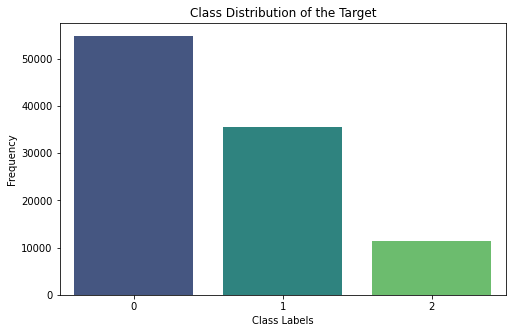

In [29]:
# Visualize class imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x=df_encoded['readmitted'], palette='viridis')
plt.title('Class Distribution of the Target')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

- The imbalance will be handled through class weights and sampling techniques


Train-test split

In [30]:
from sklearn.model_selection import train_test_split
# Train-test split
X = df_encoded.drop(columns=['readmitted'])
y = df_encoded['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Baseline models: Logistic Regressiona and Decision Trees with default parameters

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Logistic Regression and Decision Tree without balancing
print("\n**Unbalanced Models:**")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression (Unbalanced):")
print(classification_report(y_test, y_pred_logreg))

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("\nDecision Tree (Unbalanced):")
print(classification_report(y_test, y_pred_dtree))


**Unbalanced Models:**


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression (Unbalanced):
              precision    recall  f1-score   support

           0       0.61      0.87      0.71     10952
           1       0.51      0.33      0.40      7117
           2       0.38      0.02      0.04      2285

    accuracy                           0.58     20354
   macro avg       0.50      0.41      0.39     20354
weighted avg       0.55      0.58      0.53     20354


Decision Tree (Unbalanced):
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     10952
           1       0.39      0.40      0.39      7117
           2       0.16      0.16      0.16      2285

    accuracy                           0.47     20354
   macro avg       0.38      0.38      0.38     20354
weighted avg       0.47      0.47      0.47     20354



Handling Class Imbalance through Class weights and SMOTE
- Applying Class weights

In [32]:

# Logistic Regression with balanced class weights
print("\n**Balanced Class Weight Models:**")
logreg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_balanced.fit(X_train, y_train)
y_pred_logreg_bal = logreg_balanced.predict(X_test)
print("\nLogistic Regression (Balanced Class Weights):")
print(classification_report(y_test, y_pred_logreg_bal))

dtree_balanced = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dtree_balanced.fit(X_train, y_train)
y_pred_dtree_bal = dtree_balanced.predict(X_test)
print("\nDecision Tree (Balanced Class Weights):")
print(classification_report(y_test, y_pred_dtree_bal))




**Balanced Class Weight Models:**


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression (Balanced Class Weights):
              precision    recall  f1-score   support

           0       0.67      0.59      0.63     10952
           1       0.45      0.39      0.42      7117
           2       0.20      0.41      0.27      2285

    accuracy                           0.50     20354
   macro avg       0.44      0.46      0.44     20354
weighted avg       0.54      0.50      0.51     20354


Decision Tree (Balanced Class Weights):
              precision    recall  f1-score   support

           0       0.60      0.58      0.59     10952
           1       0.39      0.40      0.40      7117
           2       0.15      0.16      0.15      2285

    accuracy                           0.47     20354
   macro avg       0.38      0.38      0.38     20354
weighted avg       0.48      0.47      0.47     20354



Applying SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
# SMOTE for Oversampling
print("\n**SMOTE Models:**")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

logreg_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred_logreg_smote = logreg_smote.predict(X_test)
print("\nLogistic Regression (SMOTE):")
print(classification_report(y_test, y_pred_logreg_smote))

dtree_smote = DecisionTreeClassifier(random_state=42)
dtree_smote.fit(X_train_smote, y_train_smote)
y_pred_dtree_smote = dtree_smote.predict(X_test)
print("\nDecision Tree (SMOTE):")
print(classification_report(y_test, y_pred_dtree_smote))



**SMOTE Models:**


/home/leo/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression (SMOTE):
              precision    recall  f1-score   support

           0       0.68      0.52      0.59     10952
           1       0.44      0.42      0.43      7117
           2       0.18      0.42      0.25      2285

    accuracy                           0.47     20354
   macro avg       0.43      0.45      0.42     20354
weighted avg       0.54      0.47      0.49     20354


Decision Tree (SMOTE):
              precision    recall  f1-score   support

           0       0.59      0.58      0.59     10952
           1       0.40      0.40      0.40      7117
           2       0.16      0.17      0.16      2285

    accuracy                           0.47     20354
   macro avg       0.38      0.38      0.38     20354
weighted avg       0.48      0.47      0.47     20354



### Model Tuning
- Applying XGB classifier with SMOTE


In [34]:
X_train.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Asian', 'race_Caucasian',
       ...
       'diag_3_category_Injury and Poisoning',
       'diag_3_category_Mental Disorders',
       'diag_3_category_Musculoskeletal Diseases', 'diag_3_category_Neoplasms',
       'diag_3_category_Nervous System Disorders',
       'diag_3_category_Pregnancy-Related Conditions',
       'diag_3_category_Respiratory System Diseases',
       'diag_3_category_Skin and Subcutaneous Tissue Diseases',
       'diag_3_category_Symptoms, Signs, and Ill-Defined Conditions',
       'diag_3_category_Unclassified'],
      dtype='object', length=170)

In [35]:
#import
from xgboost import XGBClassifier
# Apply SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Ensure feature names are strings and remove special characters
X_train_smote.columns = X_train_smote.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)

# Train XGBoost model with SMOTE
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_xgb_smote = xgb_smote.predict(X_test)
print("\nXGBoost (After SMOTE):")
print(classification_report(y_test, y_pred_xgb_smote))

[10:55:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



XGBoost (After SMOTE):
              precision    recall  f1-score   support

           0       0.62      0.83      0.71     10952
           1       0.51      0.39      0.44      7117
           2       0.42      0.05      0.09      2285

    accuracy                           0.59     20354
   macro avg       0.52      0.42      0.41     20354
weighted avg       0.56      0.59      0.55     20354



### Target Conversion
- Since recall is quite low in classes `1` and `2`, we convert the target to binary and check if results improve

In [36]:


# Convert target to binary (1 if y is 1 or 2, else 0)
y_train_bin = y_train.copy()
y_test_bin = y_test.copy()

y_train_bin = y_train_bin.map(lambda x: 1 if x in [1, 2] else 0)
y_test_bin = y_test_bin.map(lambda x: 1 if x in [1, 2] else 0)

# Apply SMOTE on the binary labels
smote = SMOTE(random_state=42)
X_train_smote_bin, y_train_smote_bin = smote.fit_resample(X_train, y_train_bin)

# Ensure feature names are valid
X_train_smote_bin.columns = X_train_smote_bin.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)

# Train XGBoost model on binary target
xgb_bin = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_bin.fit(X_train_smote_bin, y_train_smote_bin)

# Predict and evaluate
y_pred_xgb_bin = xgb_bin.predict(X_test)
print("\nXGBoost (Binary Target After SMOTE):")
print(classification_report(y_test_bin, y_pred_xgb_bin))


[10:58:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



XGBoost (Binary Target After SMOTE):
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     10952
           1       0.63      0.55      0.59      9402

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354



## **Analysis of XGBoost Model After Binary Target Conversion**

### **Overview**
After converting the target variable from a three-class (tertiary) classification problem to a binary one—where both readmitted classes (1: after 30 days and 2: within 30 days) were merged into a single "readmitted" category (1)—we reevaluated model performance using XGBoost with SMOTE.

The new results are as follows:

### **XGBoost (Binary Target After SMOTE)**

          precision    recall  f1-score   support

       0       0.65      0.72      0.68     10952
       1       0.63      0.55      0.59      9402

accuracy                           0.64     20354




### **Comparison with Previous Models (Tertiary Target)**
| Model                         | Accuracy | Macro Precision | Macro Recall | Macro F1-score |
|--------------------------------|----------|----------------|--------------|----------------|
| **XGBoost (Binary)**           | **0.64** | **0.64**       | **0.64**     | **0.64**       |
| Logistic Regression (SMOTE)    | 0.47     | 0.43           | 0.45         | 0.42           |
| Decision Tree (SMOTE)          | 0.47     | 0.38           | 0.38         | 0.38           |

### **Key Observations**
- **Significant Performance Boost:**  
  - The **XGBoost model with a binary target achieves 64% accuracy**, a great improvement over the previous logistic regression (47%) and decision tree (47%) models.  
  - The **macro F1-score improves to 0.64**, indicating better balance between precision and recall.  

- **Class-wise Performance:**  
  - **Not Readmitted (0) Class:**  
    - **Precision:** 0.65 → 65% of predicted "not readmitted" cases are correct.  
    - **Recall:** 0.72 → The model correctly identifies 72% of patients who are not readmitted.  
  - **Readmitted (1) Class:**  
    - **Precision:** 0.63 → 63% of predicted "readmitted" cases are correct.  
    - **Recall:** 0.55 → The model correctly identifies 55% of readmitted patients.  
  - **Balanced Precision and Recall:** Both classes have fairly close precision and recall values, meaning the model maintains consistency across predictions.

- **Strengths of the Binary Conversion Approach:**
  - **Simplified classification problem:** Combining classes 1 and 2 reduces complexity, leading to clearer distinctions.  
  - **Improved recall for readmitted patients:** Previously, recall for readmission (1 and 2) was much lower (~0.40 in prior models).  
  - **XGBoost benefits from class balancing with SMOTE**, leveraging its strength in handling class imbalance and feature interactions.  

### **Conclusion**
The results confirm that converting the target variable to binary significantly improves classification performance.  
**XGBoost emerges as the best-performing model, achieving higher accuracy, precision, recall, and F1-score** compared to the previous multi-class models. Further hyperparameter tuning and feature engineering could enhance performance even further.


- Applying XGB boost with balanced weights

## Model Tuning
- Applying XGB boost with balanced weights

In [37]:

from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
# Ensure feature names are strings and remove special characters
X_train.columns = X_train.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
# Compute scale_pos_weight
pos_weight = np.bincount(y_train_bin)[0] / np.bincount(y_train_bin)[1]

# Train XGBoost model with scale_pos_weight
xgb_bin = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=pos_weight,  # Handling class imbalance
    random_state=42
)

# Fit model
xgb_bin.fit(X_train, y_train_bin)

# Predict and evaluate
y_pred_xgb_bin = xgb_bin.predict(X_test)
print("\nXGBoost (Binary Target with scale_pos_weight):")
print(classification_report(y_test_bin, y_pred_xgb_bin))


[10:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



XGBoost (Binary Target with scale_pos_weight):
              precision    recall  f1-score   support

           0       0.67      0.65      0.66     10952
           1       0.61      0.63      0.62      9402

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354



- Using GridSearchCV to get best parameters

In [38]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 6],  # Controls tree depth, reducing for speed
    'learning_rate': [0.01, 0.1],  # Small and moderate learning rates
    'n_estimators': [50, 100],  # Reduce number of trees for faster training
    'subsample': [0.8],  # Fixed to avoid unnecessary search
    'colsample_bytree': [0.8],  # Feature sampling, fixed for speed
    'gamma': [0, 0.1],  # Controls regularization, minimal values
    'reg_lambda': [1],  # L2 Regularization, keeping constant for speed
    'scale_pos_weight': [pos_weight]  # Ensures class imbalance is handled
}

# Initialize XGBClassifier
xgb_grid = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Perform Grid Search
grid_search = GridSearchCV(
    xgb_grid,
    param_grid,
    scoring='f1',  # F1-score to balance precision & recall
    cv=3,  # 3-fold CV to speed up search
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit Grid Search
grid_search.fit(X_train, y_train_bin)

# Print best parameters and best score
print("\nBest Parameters:", grid_search.best_params_)
print("\nBest F1 Score:", grid_search.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[11:06:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'reg_lambda': 1, 'scale_pos_weight': 1.1709866666666666, 'subsample': 0.8}

Best F1 Score: 0.6172874774106718


### Best Model Evaluation



In [39]:

# Initialize XGBoost with best parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    reg_lambda=1,
    scale_pos_weight=1.1709866666666666,
    subsample=0.8,
    eval_metric='logloss',
    random_state=42
)

# Train on full training data
best_xgb.fit(X_train, y_train_bin)

# Predict on test set
y_pred_best_xgb = best_xgb.predict(X_test)

# Print classification report
print("\nClassification Report for Best XGBoost Model:")
print(classification_report(y_test_bin, y_pred_best_xgb))



Classification Report for Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67     10952
           1       0.61      0.62      0.62      9402

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354



### Feature Importance



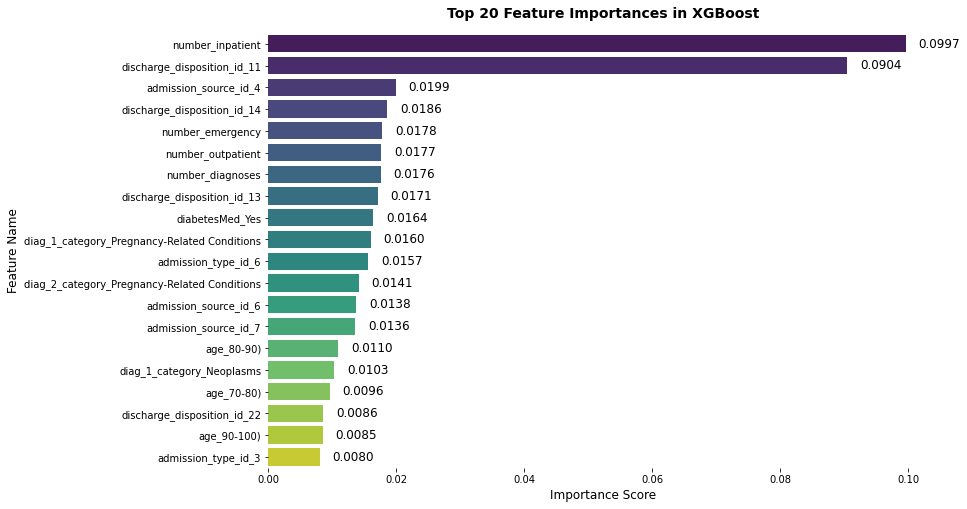


Top 20 Most Important Features:

                                          Feature  Importance
6                                number_inpatient    0.099656
40                    discharge_disposition_id_11    0.090443
58                          admission_source_id_4    0.019946
43                    discharge_disposition_id_14    0.018578
5                                number_emergency    0.017835
4                               number_outpatient    0.017684
7                                number_diagnoses    0.017558
42                    discharge_disposition_id_13    0.017095
121                               diabetesMed_Yes    0.016427
133  diag_1_category_Pregnancy-Related Conditions    0.016013
28                            admission_type_id_6    0.015661
149  diag_2_category_Pregnancy-Related Conditions    0.014123
60                          admission_source_id_6    0.013769
61                          admission_source_id_7    0.013572
22                                  

In [40]:


import seaborn as sns


# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top 20 features
top_features = feature_importance.head(20)

# Create a gradient color palette
colors = sns.color_palette("viridis", len(top_features))

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Importance', 
    y='Feature', 
    data=top_features, 
    palette=colors
)

# Add importance values on bars
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.002, i, f"{v:.4f}", color='black', va='center', fontsize=12)

# Style adjustments
plt.title('Top 20 Feature Importances in XGBoost', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)

# Show plot
plt.show()

# Print top features
print("\nTop 20 Most Important Features:\n")
print(top_features)


### 🔑 Key Features Influencing Patient Readmission  

Understanding which factors contribute to patient readmission can help hospitals improve care and reduce unnecessary returns. Based on the **feature importance analysis from our XGBoost model**, the following features play a crucial role in determining whether a patient is likely to be readmitted:  

#### 1️⃣ **Number of Inpatient Visits** (`number_inpatient`)  
   - This is the **strongest predictor** of readmission.  
   - Patients with more prior inpatient visits have a higher likelihood of returning, possibly due to **chronic conditions or complications**.  

#### 2️⃣ **Number of Emergency Visits** (`number_emergency`)  
   - A high number of emergency visits suggests **instability in a patient’s health**.  
   - Frequent emergency visits may indicate **poorly managed chronic conditions** or lack of **proper outpatient follow-up**.  

#### 3️⃣ **Number of Outpatient Visits** (`number_outpatient`)  
   - While outpatient visits can be a sign of proactive healthcare management, **an unusually high count** may signal **ongoing medical issues that require hospitalization**.  

#### 4️⃣ **Number of Diagnoses** (`number_diagnoses`)  
   - Patients with multiple diagnoses tend to have **complex health conditions**, making them more prone to readmission.  
   - Effective **care coordination and follow-up plans** are crucial for these patients.  

#### 5️⃣ **Use of Diabetes Medication** (`diabetesMed_Yes`)  
   - Patients on diabetes medication may have an increased readmission risk due to **poor blood sugar control, medication side effects, or complications**.  
   - Monitoring medication adherence and adjusting treatment plans can help reduce readmissions.  

#### 6️⃣ **Pregnancy-Related Diagnoses** (`diag_1_category_Pregnancy-Related Conditions`)  
   - Pregnancy-related complications may lead to **follow-up hospitalizations**, especially in high-risk cases.  
   - Ensuring **proper postnatal care** and **early intervention** can help prevent readmission.  

#### 7️⃣ **Cancer (Neoplasms) Diagnosis** (`diag_1_category_Neoplasms`)  
   - Patients diagnosed with cancer often require **frequent hospital visits** for treatment, complications, or symptom management.  
   - Coordinated oncology care and symptom control can reduce unnecessary hospital stays.  

#### 8️⃣ **Elderly Patients (Age 80-90)** (`age_80-90`)  
   - Older patients are more prone to **complications, infections, and chronic disease exacerbations**.  
   - Special care plans, **home health support, and medication reviews** can reduce their readmission rates.  

#### 9️⃣ **Elderly Patients (Age 70-80)** (`age_70-80`)  
   - Similar to the **80-90 age group**, these patients often have **age-related chronic conditions** that require close monitoring.  
   - Preventive healthcare measures, physical therapy, and **early intervention strategies** can help reduce their likelihood of readmission.  

---


## 📌 Conclusions & Recommendations  

### 🔍 Key Findings  

### 1️⃣ Target Conversion to Binary Classification  
- The original target variable, which categorized readmissions into three groups (`not readmitted`, `readmitted after 30 days`, `readmitted within 30 days`), was converted into a **binary classification**:  
  - `0` → **Not Readmitted**  
  - `1` → **Readmitted (either within 30 or after 30 days)**  
- This conversion was necessary to simplify the problem and improve model performance, but it also means the model does not differentiate between early and late readmissions. This should be considered when making **clinical decisions**.  

### 2️⃣ Model Performance & Success Criteria  
- The best-performing model, **XGBoost**, achieved:  
  - **Recall**: **0.62** (for readmitted patients)  
  - **Precision**: **0.61**  
  - **F1-score**: **0.62**  
  - **Overall Accuracy**: **64%**  
- Given that **recall was a priority metric** (to minimize false negatives and ensure high-risk patients are not overlooked), the model successfully identifies a **majority of readmitted patients**, though some improvements can still be made.  

### 3️⃣ Key Factors Influencing Readmission  
- Patients with a **higher number of inpatient and emergency visits** had a significantly greater likelihood of readmission.  
- **Older patients (70-100 years)** were more prone to readmission, highlighting the need for better elderly patient management.  
- **Cancer and pregnancy-related diagnoses** showed notable influence, suggesting that tailored discharge plans for these patients could be beneficial.  
- **Medication adherence**, particularly for diabetes management, played a crucial role, reinforcing the importance of post-discharge patient support programs.  

---

# 📢 Recommendations  

### 1️⃣ Implement Targeted Post-Discharge Interventions  
- High-risk patients identified by the model (e.g., those with frequent hospital visits or multiple diagnoses) should receive **enhanced post-discharge monitoring**.  
- This includes **telemedicine check-ups, medication adherence tracking, and home healthcare support**.  

### 2️⃣ Improve Outpatient Follow-Up for Chronic Patients  
- Frequent inpatient or emergency visits indicate **poor disease management**.  
- Hospitals should strengthen outpatient care programs, ensuring that high-risk patients have **scheduled follow-ups within 30 days of discharge**.  

### 3️⃣ Address Age-Related Readmission Risks  
- Special care plans should be designed for elderly patients (70+ years old), including **fall prevention, home assistance, and medication management programs**.  

### 4️⃣ Optimize Medication Management for Diabetes Patients  
- Since medication adherence significantly impacts readmission risk, hospitals should focus on **personalized medication plans, patient education, and pharmacist-led interventions** to reduce unnecessary hospital returns.  

### 5️⃣ Consider Multi-Class Classification for Future Studies  
- While the binary classification approach simplifies prediction, distinguishing between **early (within 30 days) and late readmissions** may provide **richer insights** for intervention strategies.  
- A future model could use **multi-class classification** to identify different risk levels and optimize tailored responses.  

### 6️⃣ Further Model Optimization & Deployment  
- **Fine-tuning hyperparameters** and **exploring ensemble methods** (e.g., blending XGBoost with other models) could improve recall without sacrificing precision.  
- If deployed in a hospital system, the model should integrate with **Electronic Health Records (EHRs)** for real-time patient risk assessment.  

### 🏥 **Final Thoughts**  

This project successfully demonstrated that **machine learning can be leveraged to predict diabetes-related hospital readmissions**, providing actionable insights to enhance patient care and **reduce the financial burden of avoidable readmissions**.  

While the current model achieves **a balanced recall and precision**, ongoing refinement and **integration into hospital workflows** will maximize its impact. The insights derived can help shape **policy decisions**, enhance **resource allocation**, and ultimately **improve healthcare outcomes for diabetic patients**.  




**Next Steps:** 
- Deploy the model in a **real-world hospital setting** and continuously refine it with **more recent medical data** to maintain relevance with evolving treatment protocols.  
---

### 🔍 Key Findings  

### 1️⃣ Target Conversion to Binary Classification  
- The original target variable, which categorized readmissions into three groups (`not readmitted`, `readmitted after 30 days`, `readmitted within 30 days`), was converted into a **binary classification**:  
  - `0` → **Not Readmitted**  
  - `1` → **Readmitted (either within 30 or after 30 days)**  
- This conversion was necessary to simplify the problem and improve model performance, but it also means the model does not differentiate between early and late readmissions. This should be considered when making **clinical decisions**.  

### 2️⃣ Model Performance & Success Criteria  
- The best-performing model, **XGBoost**, achieved:  
  - **Recall**: **0.62** (for readmitted patients)  
  - **Precision**: **0.61**  
  - **F1-score**: **0.62**  
  - **Overall Accuracy**: **64%**  
- Given that **recall was a priority metric** (to minimize false negatives and ensure high-risk patients are not overlooked), the model successfully identifies a **majority of readmitted patients**, though some improvements can still be made.  

### 3️⃣ Key Factors Influencing Readmission  
- Patients with a **higher number of inpatient and emergency visits** had a significantly greater likelihood of readmission.  
- **Older patients (70-100 years)** were more prone to readmission, highlighting the need for better elderly patient management.  
- **Cancer and pregnancy-related diagnoses** showed notable influence, suggesting that tailored discharge plans for these patients could be beneficial.  
- **Medication adherence**, particularly for diabetes management, played a crucial role, reinforcing the importance of post-discharge patient support programs.  

---

# 📢 Recommendations  

### 1️⃣ Implement Targeted Post-Discharge Interventions  
- High-risk patients identified by the model (e.g., those with frequent hospital visits or multiple diagnoses) should receive **enhanced post-discharge monitoring**.  
- This includes **telemedicine check-ups, medication adherence tracking, and home healthcare support**.  

### 2️⃣ Improve Outpatient Follow-Up for Chronic Patients  
- Frequent inpatient or emergency visits indicate **poor disease management**.  
- Hospitals should strengthen outpatient care programs, ensuring that high-risk patients have **scheduled follow-ups within 30 days of discharge**.  

### 3️⃣ Address Age-Related Readmission Risks  
- Special care plans should be designed for elderly patients (70+ years old), including **fall prevention, home assistance, and medication management programs**.  

### 4️⃣ Optimize Medication Management for Diabetes Patients  
- Since medication adherence significantly impacts readmission risk, hospitals should focus on **personalized medication plans, patient education, and pharmacist-led interventions** to reduce unnecessary hospital returns.  

### 5️⃣ Consider Multi-Class Classification for Future Studies  
- While the binary classification approach simplifies prediction, distinguishing between **early (within 30 days) and late readmissions** may provide **richer insights** for intervention strategies.  
- A future model could use **multi-class classification** to identify different risk levels and optimize tailored responses.  

### 6️⃣ Further Model Optimization & Deployment  
- **Fine-tuning hyperparameters** and **exploring ensemble methods** (e.g., blending XGBoost with other models) could improve recall without sacrificing precision.  
- If deployed in a hospital system, the model should integrate with **Electronic Health Records (EHRs)** for real-time patient risk assessment.  


# **MODEL DEPLOYMENT GUIDE** 

## **1. Save the Model and Preprocessing Pipeline**  
Train the **best model** and save it along with the preprocessing pipeline (e.g., encoding, scaling) using **pickle** to enable easy loading for predictions.

## **2. Install Dependencies**  
Install **Flask** as the web framework to:  
- Serve the model  
- Handle form submissions  
- Render dynamic HTML templates  

## **3. Organize Project Structure**  
Follow a **clear directory structure** for better maintainability:  
```
Deployment/
├── app.py                                                                      # Flask app (backend)
├── diabetes_model.pkl         # Pickle encoder, model and/or pipeline                      (backend)
├── templates/                                                                              # (front end)
│   └── homepage.html          # Main HTML page with input form and results
├── static/                                                                                 # (front end)
│   ├── css/
│   │   └── styles.css         # Styles for the web app
│   └── images/
│       ├── background.jpg     # Background image
│       └── diabetes_chart.png # Visualizations (if needed)

```


## **4. Develop the Flask App (`app.py`)**  
Create a **Flask application** with the following key routes:  

- **Home (`/`)** → Renders `homepage.html` where users input data  
- **Predict (`/predict`)** → Processes input data, makes a prediction, and returns results  

## **5. Build the HTML Interface**  
Design `homepage.html` to:  
- Provide a simple **form for user input**  
- Display the **predicted result** dynamically  

## **6. Apply Styling (CSS)**  
Enhance user experience with **`static/css/styles.css`**:  
- Set a **background image (`background.jpg`)**  
- Ensure a **clean and user-friendly layout**  
- Style **buttons and input fields** for better UX  

## **7. Load and Use the Pickled Model**  
- Load `diabetes_model.pkl` inside `app.py`  
- Ensure the **same preprocessing pipeline** (e.g., encoding, scaling) is applied to user input before making predictions  

## **8. Handle Predictions**  
- Extract user input from the form  
- Convert input into a **DataFrame** for model compatibility  
- Pass the data through the **trained pipeline** for transformation  
- Predict the diabetes readmission status and return the result  

## **9. Run and Deploy the Flask App**  
- Test the app **locally** (`python app.py`)  
- Deploy it on a cloud service like **Render, Heroku, or AWS** for public access  

---

## **Project Workflow Summary**  

1. **Train & Save Model** → Serialize the best model and preprocessing pipeline  
2. **Set Up Flask App** → Load model, create routes, handle user input  
3. **Develop Frontend** → HTML form for data entry & results  
4. **Make Predictions** → Process input, run the model, display output  
5. **Deploy** → Host the app online for real-world usage  

---

## **File Descriptions**  

### **Backend**  
- **`app.py`**  
  - Main Flask application handling routing, form submissions, and predictions  
- **`diabetes_model.pkl`**  
  - Pickled machine learning model with preprocessing steps for consistent predictions  

### **Frontend**  
- **`templates/homepage.html`**  
  - User interface for input collection and displaying prediction results  
- **`static/css/styles.css`**  
  - CSS file for styling the web application  
- **`static/images/`**  
  - Stores UI assets like:  
  - **`background.jpg`** → Background image for aesthetics  
  - **`diabetes_chart.png`** → Optional visualization (e.g., model performance or trends)  

Follow these steps to successfully deploy your  Prediction Model. 


# THINGS TO NOTE WHILE PICKLING AND HANDLING DATA 

## **1. Pickling the Model and Preprocessing Pipeline**  
Pickling is the process of **serializing and saving Python objects** (such as models, encoders, and pipelines) into a file. This ensures that the trained model and its preprocessing steps can be **reloaded** later without retraining.  

### **Steps for Pickling:**  
1. Train the best model and finalize preprocessing steps (e.g., encoding, scaling).  
2. Save the trained model, encoder, and preprocessing pipeline using the `pickle` library.  
3. Store the pickled file (`diabetes_model.pkl`) in the deployment folder for easy access.  
4. Load the pickled model during deployment to ensure consistency in preprocessing and predictions.  

---

## **2. Reading User Data in Deployment**  

When a user submits input via the web interface:  
1. The **Flask app** retrieves the form data from `homepage.html`.  
2. The input values are extracted using Flask’s `request.form` method.  
3. The data is converted into a structured format (e.g., a Pandas DataFrame) to match the expected model input.  

---

## **3. Preprocessing and Encoding User Data**  

To ensure the model can correctly interpret user data:  
1. The input data must undergo the **same preprocessing** steps used during training.  
2. The saved **encoder and scaler** are loaded and applied to transform the data.  
3. Categorical features (e.g., `race`, `gender`, `admission_type_id`) are **encoded** using the trained encoder.  
4. Numerical features (e.g., `age`, `num_lab_procedures`, `num_medications`) are **scaled** if required.  
5. The transformed data is prepared in the correct format for model inference.  

---

## **4. Making Predictions**  

1. The **preprocessed user input** is passed to the trained model.  
2. The model outputs a **prediction** (e.g., readmission status).  
3. The result is **converted into a human-readable format** (e.g., "Not Readmitted" or "Readmitted").  

---

## **5. Displaying the Prediction to the User**  

1. The prediction result is sent back to `homepage.html`.  
2. The web page dynamically updates to display the **readmission prediction** to the user.  
3. If needed, additional visualizations (e.g., diabetes trends) can be presented.  

---

## **6. Ensuring Consistency in Encoding & Processing**  

1. The preprocessing pipeline used in training (e.g., **OneHotEncoder**, **StandardScaler**) must be applied **exactly the same way** during inference.  
2. To achieve this, the **entire pipeline (encoder + model) is pickled together** and reloaded during deployment.  
3. This guarantees that user input is handled **identically to training data**, avoiding mismatches.  

---

## **7. Running the Flask App for Deployment**  

1. The Flask app is started locally or hosted on a cloud platform like **Heroku, Render, or AWS**.  
2. The user accesses the web app, inputs data, and submits the form.  
3. The Flask app processes the request, makes a prediction, and returns the result.  
4. The deployed model is now accessible to multiple users for real-time diabetes readmission predictions. 🚀  
